# Как да сортираме снимки по обектите намиращи се в тях
[Python BG](https://www.facebook.com/bulgaria.py/) - Българската Python общност


### Requirements.txt

In [0]:
%pip install cvlib opencv-python matplotlib tensorflow

     |████████████████████████████████| 10.0MB 7.7MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.3-cp36-none-any.whl size=10043491 sha256=e3f7eef9b551ec5859800e3da9683dc6245d6b960e1e3c4baf86f30924268086
  Stored in directory: /root/.cache/pip/wheels/c9/83/ca/701a48deacbc78758f33173252feb97297316c40af783264e2
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12073 sha256=f5d5e7047ed62787e82d73c49b3e37f7378687ca04f35df5b1542c715e75b7aa
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [0]:
# магия специфична само за Google Colab
%tensorflow_version 2.x

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x # магия специфична само за Google Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


### Импорти

In [0]:
import os
import shutil
import re

import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

Using TensorFlow backend.


Сваляме изображенията от github repo-то:

In [0]:
!git clone https://github.com/python-bg/notebooks/
os.chdir('/content/notebooks/Object Detection with OpenCV/')

Cloning into 'notebooks'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17 (delta 0), reused 17 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


### YOLO

Ще използваме OpenCV за засичане и разпознаване на обектите в изображенията, като под капака ще му сложим [YOLOv3](https://pjreddie.com/darknet/yolo/) модела. Той е трениран на [COCO](http://cocodataset.org/#home) dataset-а и е способен да разпознава 80 [често срещани обекта](https://github.com/arunponnusamy/object-detection-opencv/blob/master/yolov3.txt) в изображенията.

In [0]:
def show_objects(image):
    plt.figure(figsize=(9, 9)) # задава размер на показаното изображение
    img = cv2.imread(image) # зарежда изображението
    bbox, label, conf = cv.detect_common_objects(img) # засича обекти
    img_with_bbox = draw_bbox(img, bbox, label, conf) # рисува кутия около обектите
    img_corr_color = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB) # оправя цветовете
    plt.imshow(img_corr_color) # показва изображението
    plt.axis('off') # маха ненужни оси
    plt.show() # особеност на matplotlib

Нека видим как се справя с една примерна снимка.

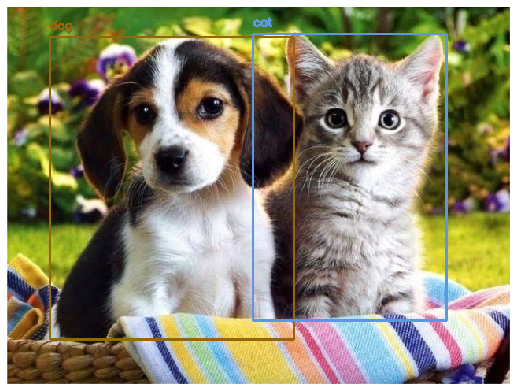

In [0]:
show_objects('Images/8881826188.jpg')

Не само, че разпознава какво има на снимката, но и знае къде точно се намира. За този кратък пример не ни е нужно да знаем къде по изображението са обектите, но тази функционалност може да се окаже полезна за по-нататъшен проект.


### Сортиране на снимки
Нека сега да отделим всички снимки на които има котки. По-горната снимка обаче има котка и куче. Решаваме, че не искаме да смесваме двете животни и ще отделим само снимките на които има котки без кучета.

Helper функция, която да ни връща само снимки от дадена директория:

In [0]:
def list_images(path, extension='jpg'):
    images = []
    pattern = re.compile(f'^.+\.{extension}$')
    for filename in os.listdir(path):
        if pattern.match(filename):
            images.append(filename)
    return images

Функция, която да мести всички снимки съдържащи даден обект и не съдържащи друг обект:

In [0]:
def move_pics(containing, excluding, from_path, to_path, extension='jpg'):   
    if not os.path.exists(to_path):
        os.makedirs(to_path)
        
    for filename in list_images(from_path, extension):
        img_path = f'{from_path}/{filename}'
        img = cv2.imread(img_path)
        _, labels, _ = cv.detect_common_objects(img)
        if containing in labels and excluding not in labels:
            shutil.move(img_path, f'{to_path}/{filename}')

Функцията може лесно да се преработи да приема няколко обекта едновременно, но за нашите цели текущия вариант е достатъчен.

In [0]:
move_pics(containing='cat', excluding='dog', from_path='Images', to_path='Cats')

Да видим какво сме преместили.

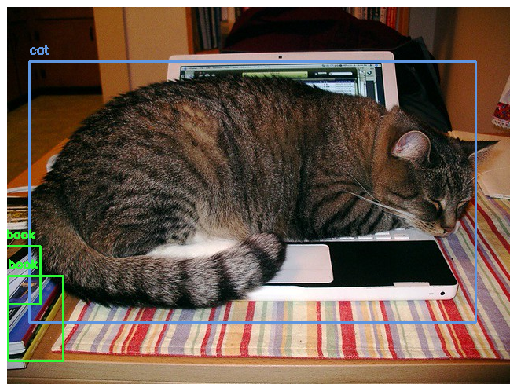

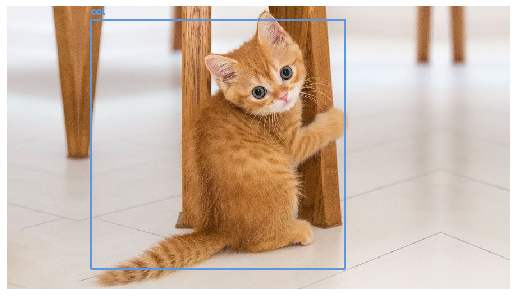

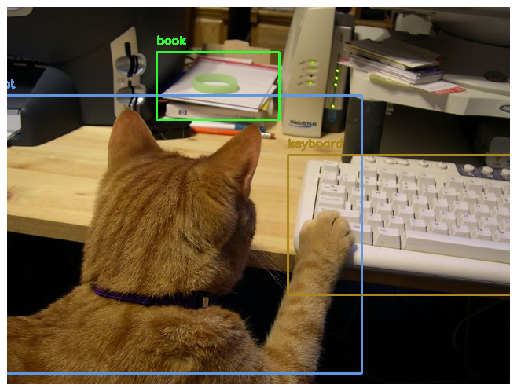

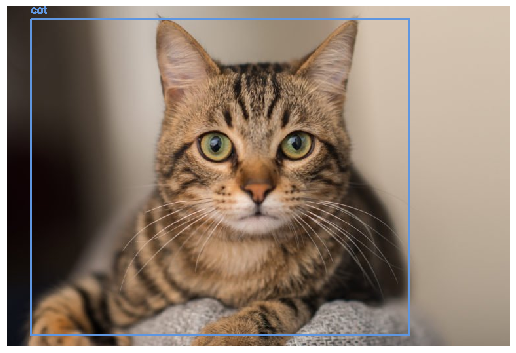

In [0]:
for image in list_images(f'Cats'):
    show_objects(f'Cats/{image}')

Супер, а какво сме оставили?

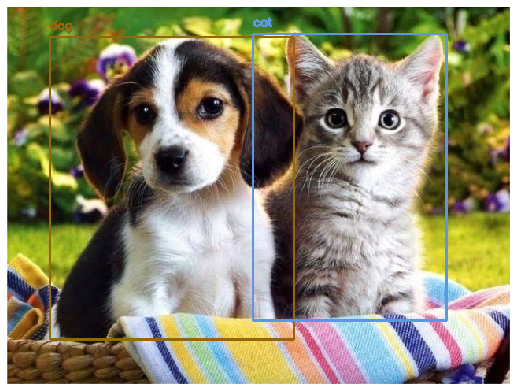

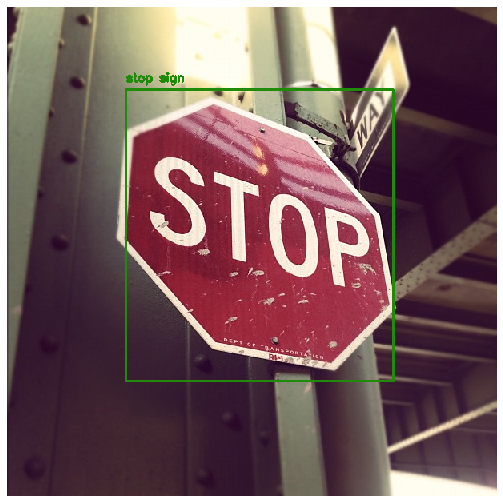

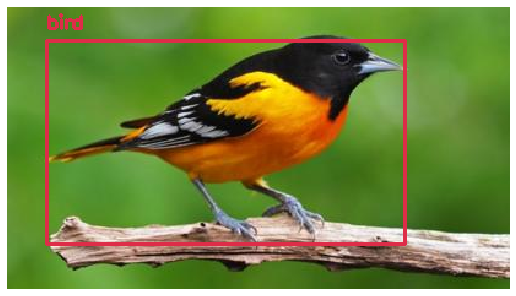

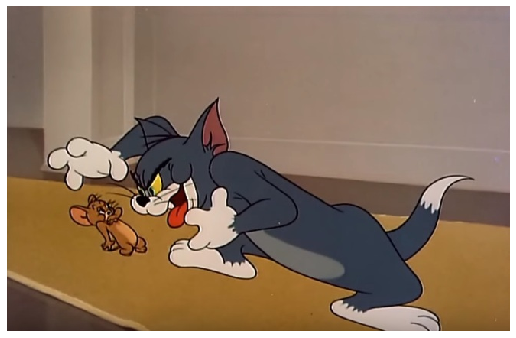

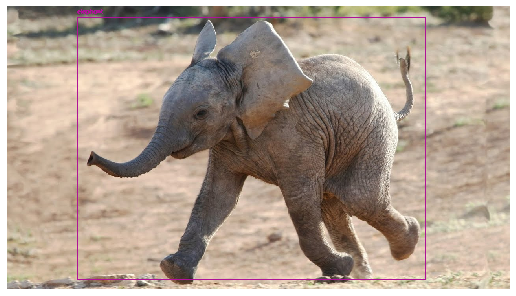

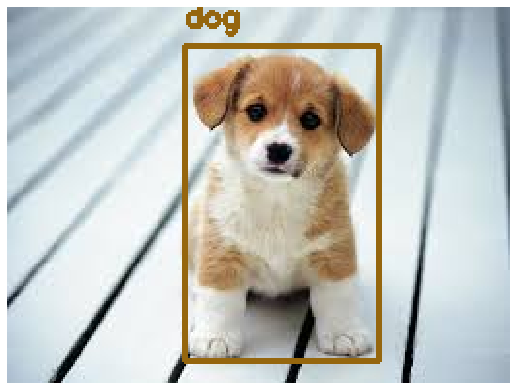

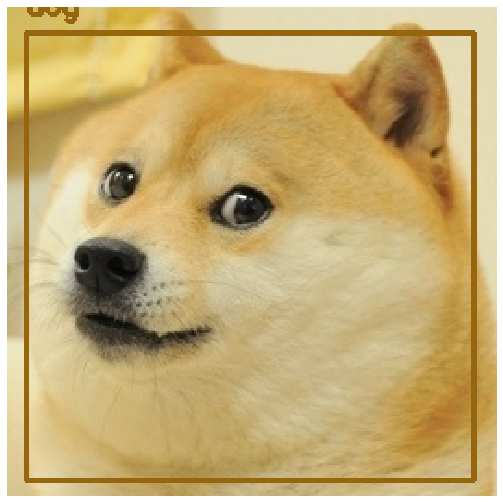

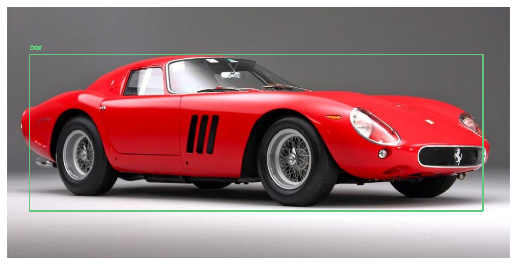

In [0]:
for image in list_images(f'Images'):
    show_objects(f'Images/{image}')

Очевидно анимираните котки не са котки според нашия модел. Което в зависимост от предпочитанията ни може да е bug или feature.


Това демо беше озаглавено Object Detection, но всъщност ние приложихме и Object Localization и Object Recognition. Както видяхте в Python всичко това става само с няколко реда код.

За повече демота и tutorial-и следете нашата фейсбук страница [Python BG](https://www.facebook.com/bulgaria.py/).